<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Data analyzing
</div>

**Import necesary libraries**

In [42]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from scipy.stats import chi2_contingency


**Read from csv**

In [24]:
df = pd.read_csv("Data/processed_data.csv")
df.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Yes,1,Rarely,Sometimes,29,Male,United States of America,United States of America,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,United Kingdom,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,1,Sometimes,Sometimes,43,Male,United Kingdom,United Kingdom,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Yes,1,Sometimes,Sometimes,43,Female,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


### Analyzing

+ Câu hỏi: **Liệu các công ty có coi trọng sức khỏe tinh thần hay không?**
+ Bằng việc trả lời câu hỏi này, ta có thể hiểu rõ sức khỏe tổng thể của nhân viên và môi trường làm việc của công ty. Vì sức khỏe tinh thần ảnh hưởng trực tiếp đến sức khỏe của nhân viên, năng suất tại nơi làm việc, tiết kiệm chi phí tuyển dụng và sự gắn bó lâu dài trong tổ chức. Ưu tiên sức khỏe tâm thần góp phần tạo ra một môi trường làm việc tích cực và ngày càng được công nhận là một khía cạnh quan trọng của hoạt động kinh doanh có trách nhiệm và bền vững.

**Preprocessing**

+ Ở phân tích này, ta chỉ quan tâm đến những câu trả lời khảo sát mà ví trị công việc thuộc lĩnh vực CNTT.

In [25]:
tech_list = []
techs = ['Back-end', 'Front-end', 'Dev', 'DevOps']
for tech in techs:
    tech_list.append(df[df['work_position'].str.contains(tech)]['work_position'].tolist())

flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list)) # remove the duplicates

# recode the list with tech work position
df['tech_flag'] = df['work_position']
df['tech_flag'].replace(to_replace = flat_list, value = 1, inplace = True)

# the other items - non tech
remain_list = df['tech_flag'].unique()[1:].tolist()
df['tech_flag'].replace(to_replace = remain_list, value = 0, inplace = True)

tech_df = df[df['tech_flag'] == 1]

**Visualization**

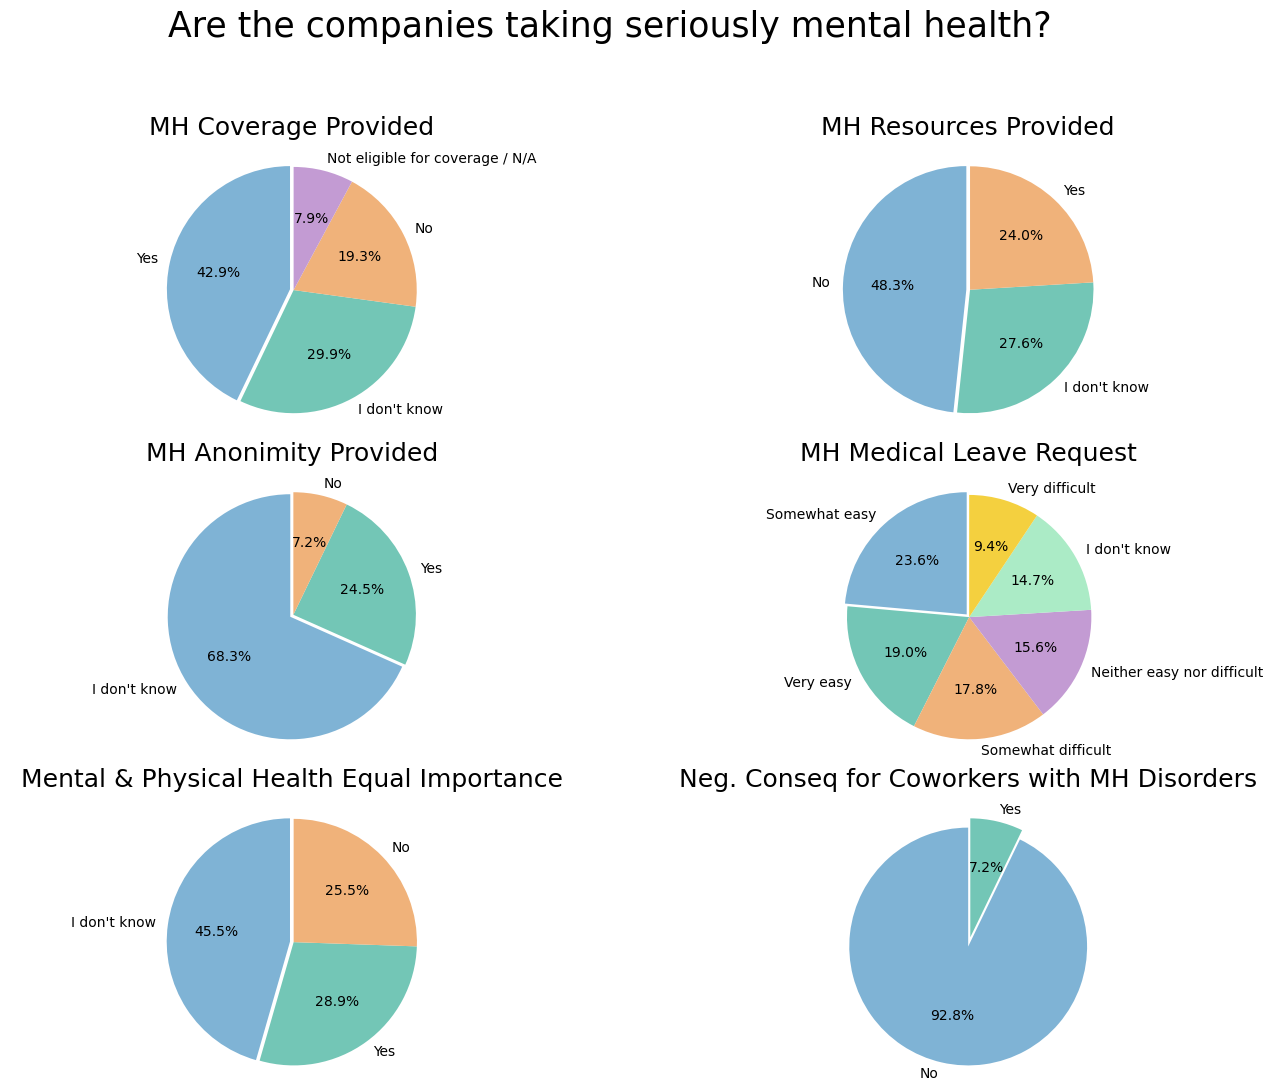

In [26]:
fig, ax = plt.subplots(figsize = (16, 12), ncols=2, nrows=3)
plt.suptitle('Are the companies taking seriously mental health?', fontsize = 25, y = 1)

# does your employer provide mental health benefits as part of healthcare coverage?
coverage_df = tech_df[['mh_coverage_flag']]
coverage_df = coverage_df['mh_coverage_flag'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3']
explode = (0.03, 0, 0, 0)
ax[0][0].pie(coverage_df['mh_coverage_flag'], explode=explode, labels=coverage_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[0][0].axis('equal')
ax[0][0].set_title('MH Coverage Provided', pad = 14, fontsize = 18)

# does your employer offer resources to learn more about mental health concerns and options for seeking help?
resource_df = tech_df[['mh_resources_provided']]
resource_df = resource_df['mh_resources_provided'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0) 
ax[0][1].pie(resource_df['mh_resources_provided'], explode=explode, labels=resource_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[0][1].axis('equal')
ax[0][1].set_title('MH Resources Provided', pad = 14, fontsize = 18)

# is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
anonimity_df = tech_df[['mh_anonimity_flag']]
anonimity_df = anonimity_df['mh_anonimity_flag'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0) 
ax[1][0].pie(anonimity_df['mh_anonimity_flag'], explode=explode, labels=anonimity_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[1][0].axis('equal')
ax[1][0].set_title('MH Anonimity Provided', pad = 14, fontsize = 18)

# if a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
medical_df = tech_df[['mh_medical_leave']]
medical_df = medical_df['mh_medical_leave'].value_counts().reset_index()
all_ = tech_df['mh_medical_leave'].count()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
explode = (0.03, 0, 0, 0, 0, 0)  
ax[1][1].pie(medical_df['mh_medical_leave'], explode=explode, labels=medical_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[1][1].axis('equal')
ax[1][1].set_title('MH Medical Leave Request', pad = 14, fontsize = 18)

# do you feel that your employer takes mental health as seriously as physical health?
physical_df = tech_df[['mh_eq_ph_employer']] 
physical_df = physical_df['mh_eq_ph_employer'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']
explode = (0.03, 0, 0) 
ax[2][0].pie(physical_df['mh_eq_ph_employer'], explode=explode, labels=physical_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[2][0].axis('equal')
ax[2][0].set_title('Mental & Physical Health Equal Importance', pad = 14, fontsize = 18)

# have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
conseq_df = tech_df[['mh_conseq_coworkers']]
conseq_df = conseq_df['mh_conseq_coworkers'].value_counts().reset_index()
colors = ['#7FB3D5', '#73C6B6']
explode = (0.08, 0) 
ax[2][1].pie(conseq_df['mh_conseq_coworkers'], explode=explode, labels=conseq_df['index'], colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax[2][1].axis('equal')
ax[2][1].set_title('Neg. Conseq for Coworkers with MH Disorders', pad = 14, fontsize = 18);

+ Từ những vấn đề liên quan đến những liệu pháp giúp cân bằng sức khỏe tinh thần mà người trả lời khảo sát được đề cập, ta sẽ tìm hiểu thêm về sự ảnh hưởng của quy mô công ty/ môi trường làm việc sẽ có sự cung cấp hỗ trợ về sức khỏe tinh thần như thế nào.

In [54]:
# company_type = small if comp_no_empl < 100
small = ['1-5', '6-25', '26-100']
isSmall = tech_df['comp_no_empl'].str.contains('|'.join(small))
tech_df['company_type'] = np.where(tech_df['comp_no_empl'].str.contains('|'.join(small)), 'small', 'large')

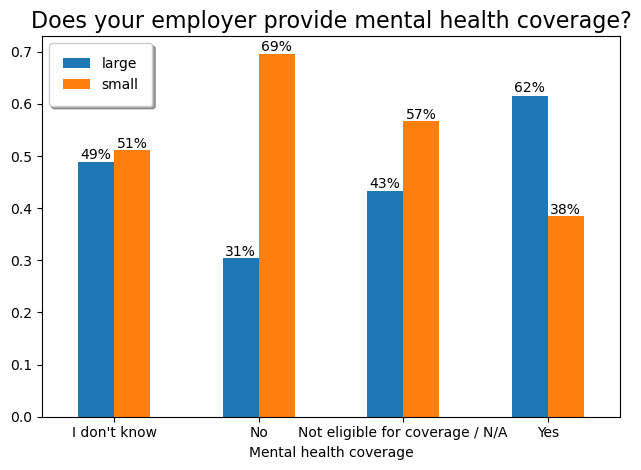

In [39]:
cbf = pd.crosstab(df['mh_coverage_flag'], df['company_type'])
bbf = pd.crosstab(df['mh_coverage_flag'], df['company_type'], normalize='index').plot.bar(rot=0)
plt.xlabel("Mental health coverage")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title("Does your employer provide mental health coverage?",fontsize=16)
for p in bbf.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    bbf.annotate(f'{height:.0%}', (x + width/2, y + height*1.01), ha='center')
plt.tight_layout()
plt.show()

In [40]:
print("Mental health coverage with respect to Company's size: ", chi2_contingency(cbf)[1])

Mental health coverage with respect to Company's size:  2.1476898400192195e-13


**Conclusion**

+ Gần một nửa số người trả lời khảo sát ($42.9\%$) đều được cung cấp `Mental Health Coverage`, tuy nhiên lại không có nguồn tài nguyên để tìm kiếm thêm thông tin về lĩnh vực này. Điều này có nghĩa rằng hầu hết các công ty đều đề cập đến sức khỏe tinh thần, nhưng không tích cực tham gia vào vấn đề đó. 
+ Hơn $70\%$ số người trả lời đều không biết rõ liệu quyền ẩn danh của họ có được bảo vệ trong trường hợp trao đổi với cấp trên về các vấn đề sức khỏe tinh thần hay không, trong khi đến gần một nửa trong số họ không chắc chắn rằng công ty sẽ cho họ nghỉ phép vì lý do liên quan đến sức khỏe tinh thần hay không.
+ Hầu hết những người được khảo sát đều không biết liệu công ty của họ có đang coi các vấn đề về sức khỏe tinh thân cũng nghiêm trọng như sức khỏe thể chất hay không. Điều đáng khích lệ là $92.8\%$ số người được hỏi không nghĩ rằng sẽ có những ảnh hưởng tiêu cực đối với những đồng nghiệp đã từng gặp vấn đề về sức khỏe tinh thần.
+ Cuối cùng, $62\%$ nhân viên được cung cấp `Mental Health Coverage` là từ những công ty có quy mô lớn. Hơn nữa, p-value thu được xấp xỉ $0$ do đó bác bỏ giả thuyết $H_0$ rằng các công ty lớn có khả năng cung cấp sự bảo vệ về sức khỏe tinh thần tương tự như các công ty nhỏ. Điều này nhắc nhở rằng cần cân nhắc về quy mô công ty cẩn thận trong quá trình làm việc.